In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import ConvexHull

# Define the number of leaders and followers
num_leaders = 3
num_followers = 6
num_agents = num_leaders + num_followers

# Define the communication topology for followers
follower_topology =  {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}

# Define the communication topology for leaders
leader_topology = {0: [0], 1: [1], 2: [2], 3: [], 4: [], 5: []}

# Create the communication topology matrix
communication_topology = np.zeros((num_followers, num_followers))
for i in range(num_followers):
    neighbors = follower_topology[i]
    for neighbor in neighbors:
        communication_topology[i, neighbor] = 1

# Compute the Laplacian matrix
degree_matrix = np.diag(np.sum(communication_topology, axis=1))
laplacian_matrix = degree_matrix - communication_topology

print("Communication Topology Matrix:")
print(communication_topology)

print("\nLaplacian Matrix:")
print(laplacian_matrix)

# Create A0
A0 = np.zeros((num_followers, num_followers))
for i in range(num_followers):
    leaders = leader_topology[i]
    A0[i, i] = len(leaders)

print("\nA0:")
print(A0)

L1=laplacian_matrix+A0
print("\nL1:")
print(L1)

# Create L2
L2 = np.zeros((num_followers, num_leaders))
for i in range(num_followers):
    leaders = leader_topology[i]
    for leader in leaders:
        L2[i, leader] = -1

print("\nL2:")
print(L2)


Communication Topology Matrix:
[[0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]

Laplacian Matrix:
[[ 2. -1.  0. -1.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.]
 [-1.  0.  0.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]

A0:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

L1:
[[ 3. -1.  0. -1.  0.  0.]
 [-1.  3. -1.  0.  0.  0.]
 [ 0. -1.  2.  0.  0.  0.]
 [-1.  0.  0.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]

L2:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [2]:
# Define the maximum movement distance per iteration for followers
max_movement_followers = 0.1

# Define the number of iterations
num_iterations = 100

# Initialize leader positions randomly in the range [0, 10)
leader_positions = 10 * np.random.rand(num_leaders, 2)

# Initialize follower positions randomly in the range [0, 10)
follower_positions = 10 * np.random.rand(num_followers, 2)
print(follower_positions)
print(leader_positions)



[[3.53350539 8.84851271]
 [6.92638983 0.03589628]
 [7.81431705 3.99203738]
 [5.6412532  2.32364103]
 [0.71868571 7.02213321]
 [6.70702724 7.94617322]]
[[1.03799376 3.49816395]
 [4.77425745 5.9147769 ]
 [4.29978902 2.9566888 ]]


In [3]:
from scipy.integrate import solve_ivp

def matrix_differential_equation(tt, X):
    X = X.reshape([num_followers, 2])
    cols=np.shape(X)[1]
    # print(cols)
    dX_dt = np.zeros((num_followers, cols))
    for i in range(cols):
        dX_dt[:,i] = - np.dot(L1,X[:,i]) - np.dot(L2,leader_positions[:,i])
    # print(dX_dt)
    dX_dt = dX_dt.reshape([1,num_followers*2])
    return dX_dt


t_sum=15 # 秒
t_span = (0, t_sum)  # 时间范围
t = np.linspace(0, t_sum, num_iterations)  # 用于绘制的时间点

# 微分方程的初值
X=follower_positions.reshape([1,num_followers*2])
print(X)

initial_condition = X[0]  # 初始条件
print(initial_condition)
solution = solve_ivp(matrix_differential_equation, t_span, initial_condition, dense_output=True)

Y = solution.sol(t)
print(len(t))
Y[:,1].reshape([num_followers, 2])

[[3.53350539 8.84851271 6.92638983 0.03589628 7.81431705 3.99203738
  5.6412532  2.32364103 0.71868571 7.02213321 6.70702724 7.94617322]]
[3.53350539 8.84851271 6.92638983 0.03589628 7.81431705 3.99203738
 5.6412532  2.32364103 0.71868571 7.02213321 6.70702724 7.94617322]
100


array([[3.80195751, 6.56786271],
       [6.33851285, 2.10595191],
       [7.196296  , 3.4957232 ],
       [4.84085406, 3.58712845],
       [2.03081716, 6.6128608 ],
       [5.96690217, 7.7835067 ]])

In [3]:
# Visualization setup
%matplotlib widget  
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
hull_line, = ax.plot([], [], c='r', linewidth=2)

leader_labels = []
follower_labels = []
for i in range(num_leaders):
    leader_labels.append(ax.text(leader_positions[i, 0], leader_positions[i, 1], f"Leader {i+1}", ha='center', va='center', color='r', fontsize=8, fontweight='bold'))
for i in range(num_followers):
    follower_labels.append(ax.text(follower_positions[i, 0], follower_positions[i, 1], f"Follower {i+1}", ha='center', va='center', color='b', fontsize=8, fontweight='bold'))

ax.legend(loc='upper right')

for k in range(num_followers):
    x=[]
    y=[]
    for i in range(num_iterations):
        x.append(Y[:,i].reshape([num_followers, 2])[k,0])
        y.append(Y[:,i].reshape([num_followers, 2])[k,1]) 
    plt.plot(x, y)
# Show the plot
plt.grid(True)
plt.show()

# Function to update the plot in each animation frame
def update(frame):
    follower_positions=Y[:,frame].reshape([num_followers, 2])

    leader_scatter.set_offsets(leader_positions)
    follower_scatter.set_offsets(follower_positions)

    # Update labels
    for i in range(num_leaders):
        leader_labels[i].set_position((leader_positions[i, 0] + 0.8, leader_positions[i, 1] + 0.1))
    for i in range(num_followers):
        follower_labels[i].set_position((follower_positions[i, 0] + 0.8, follower_positions[i, 1] + 0.1))

    # Calculate the convex hull for leaders only
    hull = ConvexHull(leader_positions)
    hull_vertices = np.append(hull.vertices, hull.vertices[0])  # Closing the hull by connecting the first vertex again
    hull_line.set_xdata(leader_positions[hull_vertices, 0])
    hull_line.set_ydata(leader_positions[hull_vertices, 1])

    return leader_scatter, follower_scatter, hull_line, *leader_labels, *follower_labels

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, interval=200, blit=True)

# Save the animation as a gif
ani.save('multi_agent_containment.gif', writer='pillow')


Agent 1: [0.6347192  0.39062939]
Agent 2: [0.6347192  0.39062939]
Agent 3: [0.6347192  0.39062939]
Agent 4: [0.6347192  0.39062939]
Agent 5: [0.6347192  0.39062939]
Agent 6: [0.6347192  0.39062939]


In [5]:
for k in range(num_followers):
    x=[]
    y=[]
    for i in range(num_iterations):
        x.append(Y[:,i].reshape([num_followers, 2])[k,0])
        y.append(Y[:,i].reshape([num_followers, 2])[k,1]) 
        plt.plot(x, y)
# Show the plot
plt.grid(True)
plt.show()

[<__main__.Agent object at 0x000001CACA544730>, <__main__.Agent object at 0x000001CACA544850>]
[<__main__.Agent object at 0x000001CACA5444C0>, <__main__.Agent object at 0x000001CACA5447F0>]
[<__main__.Agent object at 0x000001CACA5444C0>, <__main__.Agent object at 0x000001CACA5448B0>]
[<__main__.Agent object at 0x000001CACA544850>, <__main__.Agent object at 0x000001CACA544910>]
Agent 1: [0.65054743 0.73767805]
Agent 2: [0.65015054 0.73561571]
Agent 3: [0.64999888 0.73482797]
Agent 4: [0.65103774 0.74022727]
Agent 5: [0.65143418 0.74228964]
Agent 6: [0.65158555 0.7430774 ]


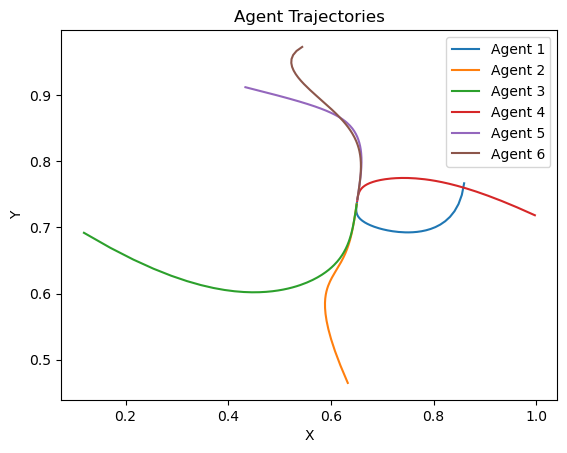

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, position):
        self.position = np.array(position)
        self.velocity = np.zeros(2)  # 初始化速度为零
        self.neighbors = []

    def move(self):
        # 根据当前速度更新位置
        self.position += self.velocity

    def update_neighbor_positions(self):
        # 更新邻居的位置信息
        neighbor_positions = [neighbor.position for neighbor in self.neighbors]
        self.target_position = np.mean(neighbor_positions, axis=0)

class Controller:
    def __init__(self, agents):
        self.agents = agents

    def update(self):
        # 先更新每个智能体的邻居位置信息
        for agent in self.agents:
            agent.update_neighbor_positions()

        # 计算每个智能体的速度，使其朝目标位置移动
        for agent in self.agents:
            direction = agent.target_position - agent.position
            agent.velocity = direction * 0.1  # 控制速度增益，可以调整这个值来控制收敛速度

def main():
    # 初始化智能体
    num_agents = 6
    agents = [Agent([np.random.rand(), np.random.rand()]) for _ in range(num_agents)]

    # 定义拓扑结构
    topology = {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}
    for i in range(num_agents):
        neighbors = [agents[j] for j in topology[i]]
        agents[i].neighbors = neighbors
        print(agents[i].neighbors)

    # 创建控制器
    controller = Controller(agents)

    # 模拟移动过程，并记录每个智能体的位置
    num_iterations = 200
    agent_positions = [[] for _ in range(num_agents)]
    for _ in range(num_iterations):
        controller.update()
        for i, agent in enumerate(agents):
            agent_positions[i].append(agent.position.copy())  # 记录当前位置的副本，以防位置被后续修改

        for agent in agents:
            agent.move()

    # 打印最终的智能体位置
    for i, agent in enumerate(agents):
        print(f"Agent {i+1}: {agent.position}")

    # 绘制智能体的运动轨迹
    for i in range(num_agents):
        positions = np.array(agent_positions[i])
        plt.plot(positions[:, 0], positions[:, 1], label=f"Agent {i+1}")

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Agent Trajectories')
    plt.show()

if __name__ == "__main__":
    main()


Agent 0: [0.44761884 0.50490685]
Agent 1: [0.44761884 0.50490685]
Agent 2: [0.44761884 0.50490685]
Agent 3: [0.44761884 0.50490685]
Agent 4: [0.44761884 0.50490685]
Agent 5: [0.44761884 0.50490685]


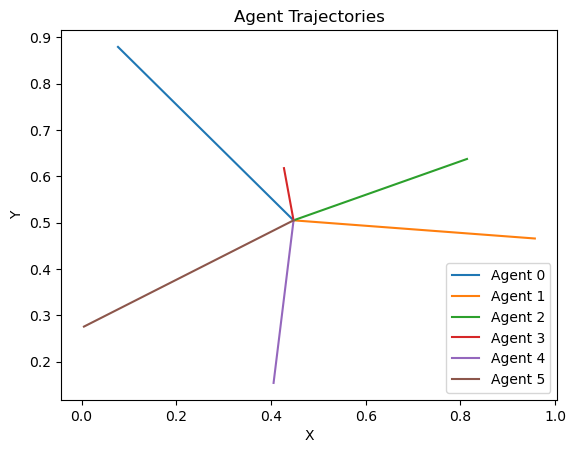

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, agent_id, position, neighbors):
        self.agent_id = agent_id
        self.position = np.array(position)
        self.velocity = np.zeros(2)  # 初始化速度为零
        self.neighbors = neighbors

    def move(self):
        # 根据当前速度更新位置
        self.position += self.velocity

class Controller:
    def __init__(self, agents):
        self.agents = agents
        self.num_agents = len(agents)
        self.target_position = np.mean([agent.position for agent in agents], axis=0)

    def update_velocities(self):
        # 计算每个智能体的速度，使其朝目标位置移动
        for agent in self.agents:
            direction = self.target_position - agent.position
            agent.velocity = direction * 0.1  # 控制速度增益，可以调整这个值来控制收敛速度

    def update_positions(self):
        # 更新每个智能体的位置
        for agent in self.agents:
            agent.move()

def main():
    # 定义邻居拓扑结构
    topology = {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}

    # 初始化智能体
    num_agents = len(topology)
    agents = [Agent(i, [np.random.rand(), np.random.rand()], topology[i]) for i in range(num_agents)]

    # 创建控制器
    controller = Controller(agents)

    # 模拟移动过程，并记录每个智能体的位置
    num_iterations = 200
    agent_positions = [[] for _ in range(num_agents)]
    for _ in range(num_iterations):
        controller.update_velocities()
        for i, agent in enumerate(agents):
            agent_positions[i].append(agent.position.copy())  # 记录当前位置的副本，以防位置被后续修改
        controller.update_positions()

    # 打印最终的智能体位置
    for agent in agents:
        print(f"Agent {agent.agent_id}: {agent.position}")

    # 绘制智能体的运动轨迹
    for i in range(num_agents):
        positions = np.array(agent_positions[i])
        plt.plot(positions[:, 0], positions[:, 1], label=f"Agent {i}")

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Agent Trajectories')
    plt.show()

if __name__ == "__main__":
    main()


[[array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan, nan]), array([nan

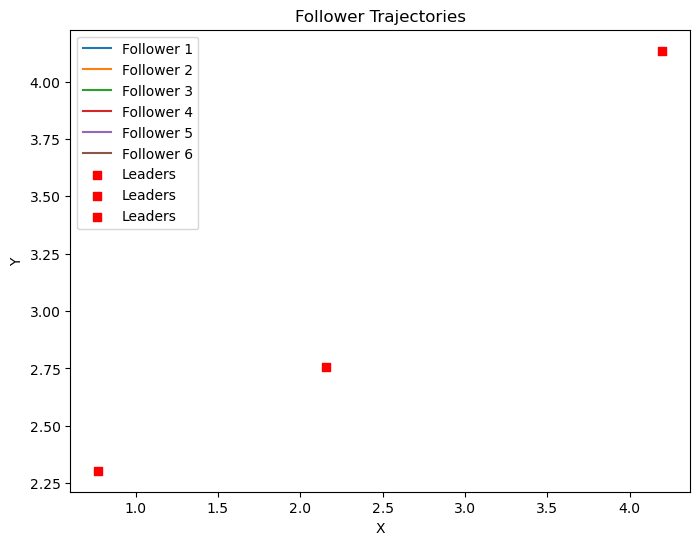

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class FollowerAgent:
    def __init__(self, position):
        self.position = np.array(position)
        self.velocity = np.zeros(2)
        self.neighbors = neighbors
    def move(self, target_position, a, b):
        direction = target_position - self.position
        self.velocity = a * direction - b * self.position
        self.position += self.velocity

class LeaderAgent:
    def __init__(self, position):
        self.position = np.array(position)

class MultiAgentSimulation:
    def __init__(self, follower_positions, leader_positions, follower_topology, leader_topology):
        self.follower_agents = [FollowerAgent(position) for position in follower_positions]
        self.leader_agents = [LeaderAgent(position) for position in leader_positions]
        
        for i, follower_agent in enumerate(self.follower_agents):
            follower_agent.neighbors = [self.follower_agents[j] for j in follower_topology[i]]
            follower_agent.leader_ids = leader_topology[i]
        
    def simulate(self, a, b, num_iterations):
        follower_positions_history = [[] for _ in range(len(self.follower_agents))]
        for _ in range(num_iterations):
            for follower_agent in self.follower_agents:
                target_position = np.mean([leader_agent.position for leader_agent in self.leader_agents if leader_agent in [self.follower_agents[j] for j in follower_agent.leader_ids]], axis=0)
                follower_agent.move(target_position, a, b)
                follower_positions_history[self.follower_agents.index(follower_agent)].append(follower_agent.position.copy())
        # 记录当前时间步的跟随者位置
        current_follower_positions = np.array([follower_agent.position for follower_agent in self.follower_agents])
        return follower_positions_history

def main():
    num_followers = 6
    num_leaders = 3
    follower_positions = 10 * np.random.rand(num_followers, 2)
    leader_positions = 0.5 * np.ones([num_leaders, 2]) + 4 * np.random.rand(num_leaders, 2)
    follower_topology = {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}
    leader_topology = {0: [0], 1: [1], 2: [2], 3: [], 4: [], 5: []}

    simulation = MultiAgentSimulation(follower_positions, leader_positions, follower_topology, leader_topology)
    
    num_iterations = 200
    follower_positions_history = simulation.simulate(a=0.1, b=0.1, num_iterations=num_iterations)
    print(follower_positions_history)
    plt.figure(figsize=(8, 6))
    for i, positions in enumerate(follower_positions_history):
        positions = np.array(positions)
        plt.plot(positions[:, 0], positions[:, 1], label=f"Follower {i+1}")
    for leader_agent in simulation.leader_agents:
        plt.scatter(leader_agent.position[0], leader_agent.position[1], color='red', marker='s', label='Leaders')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Follower Trajectories')
    plt.legend()
    plt.show()
    plt.savefig('follower_trajectories.png')  # 保存图像为PNG文件

if __name__ == "__main__":
    main()

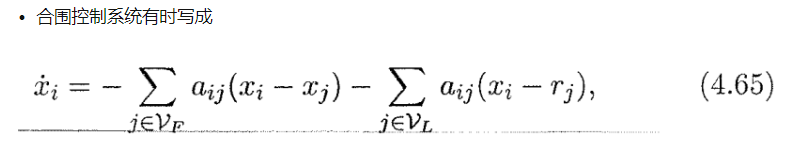

In [3]:
import math

def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def closest_point_to_convex_hull(convex_hull, point):
    min_distance = float('inf')
    closest_point = None

    for vertex in convex_hull:
        d = distance(vertex, point)
        if d < min_distance:
            min_distance = d
            closest_point = vertex

    return closest_point, min_distance

# 假设 convex_hull 是一个包含凸包上点的列表，point 是给定的点
convex_hull = [(0,0), (1,1), (2,0), (1,-1)]
point = (2,2)

# 找到最近点和距离
closest, distance = closest_point_to_convex_hull(convex_hull, point)

print(f"最近点是 {closest}，距离为 {distance}")


给定点到凸包的最近距离为 0.7071067811865475


In [18]:
import numpy as np

def distance(point, line):
    # 计算给定点到线段的垂直距离
    A, B, C = line
    x, y = point
    return abs(A*x + B*y + C) / np.sqrt(A**2 + B**2)

def closest_point_to_edge(edge, point):
    p1, p2 = edge
    
    # 计算线段的方向向量
    direction = np.array(p2, dtype=np.float64) - np.array(p1, dtype=np.float64)
    direction /= np.linalg.norm(direction)
    
    # 计算点到线段起点的向量
    v = np.array(point) - np.array(p1)
    
    # 计算点在线段上的投影
    projection = np.dot(v, direction)
    
    if projection <= 0:
        return p1
    elif projection >= np.linalg.norm(np.array(p2) - np.array(p1)):
        return p2
    else:
        return tuple(p1 + projection * direction)

def closest_distance_to_convex_hull(convex_hull, point):
    min_distance = float('inf')
    closest_point = None
    
    for i in range(len(convex_hull)):
        # 边的两个端点
        p1 = convex_hull[i]
        p2 = convex_hull[(i + 1) % len(convex_hull)]
        
        # 计算直线Ax + By + C = 0的A、B、C系数
        A = p2[1] - p1[1]
        B = p1[0] - p2[0]
        C = (p1[1] * p2[0]) - (p1[0] * p2[1])
        
        # 计算垂直距离
        d = distance(point, (A, B, C))
        
        if d < min_distance:
            min_distance = d
            closest_point = closest_point_to_edge((p1, p2), point)

    return closest_point, min_distance

# 假设 convex_hull 是一个包含凸包上点的列表，point 是给定的点
convex_hull = [(0,0), (1,1), (2,0), (1,-1)]
point = (3,2)

# 找到最近点和距离
closest, distance = closest_distance_to_convex_hull(convex_hull, point)

print(f"最近点是 {closest}，距离为 {distance}")


最近点是 (1, 1)，距离为 0.7071067811865475


In [32]:
import numpy as np

def distance_point_to_line(point, line_start, line_end):
    # 计算点到直线的距离
    line_vec = line_end - line_start
    point_vec = point - line_start
    distance = np.linalg.norm(np.cross(line_vec, point_vec)) / np.linalg.norm(line_vec)
    return distance

def closest_edge_to_point(point, polygon):
    min_distance = float('inf')
    closest_edge = None
    for i in range(len(polygon)):
        start = polygon[i]
        end = polygon[(i + 1) % len(polygon)]
        distance = distance_point_to_line(point, start, end)
        if distance < min_distance:
            min_distance = distance
            closest_edge = (start, end)
    return closest_edge

def closest_point_on_edge(point, edge_start, edge_end):
    # 计算最短距离的位置（垂足）
    edge_vec = edge_end - edge_start
    point_vec = point - edge_start
    t = np.dot(point_vec, edge_vec) / np.dot(edge_vec, edge_vec)
    t = max(0, min(1, t))  # 确保垂足在边的内部
    closest_point = edge_start + t * edge_vec
    return closest_point

def shortest_distance_to_polygon(point, polygon):
    edge = closest_edge_to_point(point, polygon)
    closest_point = closest_point_on_edge(point, *edge)
    distance = np.linalg.norm(point - closest_point)
    return distance, closest_point

# 示例用法
point = np.array([3, 2])
polygon = np.array([[0, 0], [2, 0], [2, 2], [0, 2]])
polygon = np.array([[0,0], [1,1], [2,0], [1,-1]])

distance, closest_point = shortest_distance_to_polygon(point, polygon)

print(f"最短距离: {distance}")
print(f"最短距离位置: {closest_point}")

1.414*1.5
# np.sqrt(5)

最短距离: 2.23606797749979
最短距离位置: [1 1]


2.121

In [2]:
from shapely.geometry import Point, Polygon

def shortest_distance_to_polygon_edge(point, polygon):
    # 将输入的点和多边形转换为Shapely对象
    point = Point(point)
    polygon = Polygon(polygon)

    # 计算最短距离
    distance = point.distance(polygon)
    
    # 计算最短距离位置（垂足）
    closest_point = polygon.exterior.interpolate(polygon.exterior.project(point))

    return distance, (closest_point.x, closest_point.y)

# 示例用法
point = (4, -1)
point = (3, 2)
polygon = [(0, 0), (2, 0), (2, 2), (0, 2)]
polygon = [(0,0), (1,1), (2,0), (1,-1)]

distance, closest_point = shortest_distance_to_polygon_edge(point, polygon)

print(f"最短距离: {distance}")
print(f"最短距离位置: {closest_point}")


最短距离: 2.121320343559643
最短距离位置: (1.5, 0.4999999999999999)


In [1]:
import numpy as np
leader_positions_history = [np.array([[1.37719894, 2.63877124],
                            [1.84780455, 1.3697456 ],
                            [1.42790909, 4.38526892],
                            [2.23300061, 2.9427424 ],
                            [0.87697434, 3.65408212],
                            [1.28181268, 4.45145216]]), 
                            np.array([[1.37719894, 2.63877124],
                            [1.84780454, 1.3697456 ],
                            [1.42790909, 4.38526892],
                            [2.23300061, 2.9427424 ],
                            [0.87697434, 3.65408212],
                            [1.28181268, 4.45145216]])]
leader_positions_history[-0][1,:]

array([1.84780455, 1.3697456 ])

最短距离: 2.121320343559643
最短距离位置: (1.5, 0.4999999999999999)


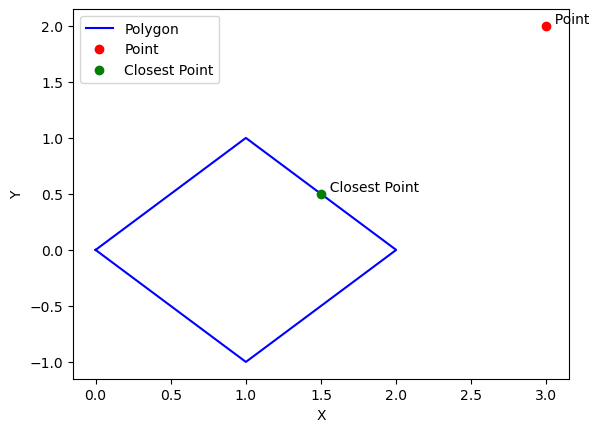

In [4]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

def plot_polygon_and_point(polygon_coords, point_coords, closest_point_coords):
    # 创建一个新的图形
    plt.figure()

    # 绘制多边形
    polygon = Polygon(polygon_coords)
    plt.plot(*polygon.exterior.xy, label='Polygon', color='blue')

    # 绘制点
    point = Point(point_coords)
    plt.plot(*point.xy, 'ro', label='Point')

    # 绘制最短距离位置（垂足）
    plt.plot(*closest_point_coords, 'go', label='Closest Point')

    # 添加标签和图例
    plt.text(point_coords[0], point_coords[1], '  Point', verticalalignment='bottom')
    plt.text(closest_point_coords[0], closest_point_coords[1], '  Closest Point', verticalalignment='bottom')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    
    # 显示图形
    plt.show()

# 示例用法
point = (4, -1)
point = (3, 2)
polygon = [(0, 0), (2, 0), (2, 2), (0, 2)]
polygon = [(0,0), (1,1), (2,0), (1,-1)]

distance, closest_point = shortest_distance_to_polygon_edge(point, polygon)

print(f"最短距离: {distance}")
print(f"最短距离位置: {closest_point}")

# 可视化
plot_polygon_and_point(polygon, point, closest_point)


In [6]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np
def shortest_distance_to_polygon_edge(point, polygon):
    # 将输入的点和多边形转换为Shapely对象
    point = Point(point)
    polygon = Polygon(polygon)

    # 计算最短距离
    distance = point.distance(polygon)
    
    # 计算最短距离位置（垂足）
    closest_point = polygon.exterior.interpolate(polygon.exterior.project(point))

    return distance, (closest_point.x, closest_point.y)
def plot_polygon_and_point(polygon_coords, point_coords, closest_point_coords):
    # 创建一个新的图形
    plt.figure()

    # 绘制多边形
    polygon = Polygon(polygon_coords)
    plt.plot(*polygon.exterior.xy, label='Polygon', color='blue')

    # 绘制点
    point = Point(point_coords)
    plt.plot(*point.xy, 'ro', label='Point')

    # 绘制最短距离位置（垂足）
    plt.plot(*closest_point_coords, 'go', label='Closest Point')

    # 添加标签和图例
    plt.text(point_coords[0], point_coords[1], '  Point', verticalalignment='bottom')
    plt.text(closest_point_coords[0], closest_point_coords[1], '  Closest Point', verticalalignment='bottom')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    
    # 显示图形
    plt.show()

# 示例用法
point = (4, -1)
point = np.array([3, 2])
point = np.array([1.3, 0.2])

polygon1 = np.array([[0,0], [1,1], [2,0], [1,-1]])
polygon = [tuple(row) for row in polygon1]

distance, closest_point = shortest_distance_to_polygon_edge(point, polygon)

print(f"最短距离: {distance}")
print(f"最短距离位置: {closest_point}")
array = np.array(closest_point)
print(array)
# 可视化
plot_polygon_and_point(polygon, point, closest_point)


ValueError: A linearring requires at least 4 coordinates.